# Convolutional Neural Network


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  1


# Import MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train[:5])

img_rows=x_train[0].shape[0]
img_cols=x_test[0].shape[1]

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 1 9]


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

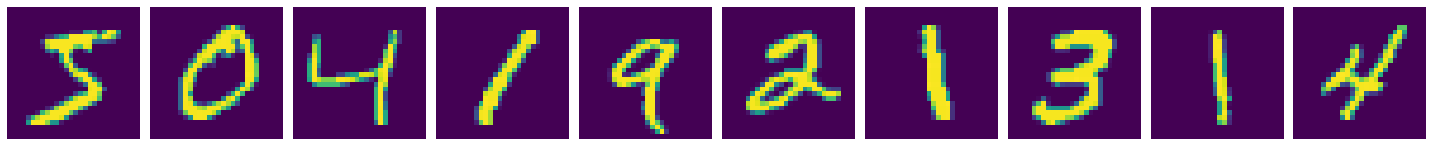

In [ ]:
plotImages(x_train[:10])

# Create a Convolutional Neural Network

In [ ]:
model = Sequential([
      Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Conv2D(32, (5,5), padding='same', activation='relu'),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Flatten(),
      Dense(1024, activation='relu'),
      Dropout(0.4),
      Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1606656   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

# Compile the Neural Network

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy']
              )

# Train the Neural Network

Built-in Callback Functions

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Checkpoint during training for best model
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/ColabNotebooks/best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

earlyStopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.00001)

### Create Your Own Callback Function

Basic Callback Functions

In [ ]:
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: end of batch {}; got log keys: {}".format(batch, keys))

Using the Logs in Callback Functions

In [ ]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print("For batch {}, loss is {:7.2f}.".format(batch, logs["loss"]))

    def on_test_batch_end(self, batch, logs=None):
        print("For batch {}, loss is {:7.2f}.".format(batch, logs["loss"]))

    def on_epoch_end(self, epoch, logs=None):
        print("The average loss for epoch {} is {:7.2f} ".format(
                epoch, logs["loss"]))

Create Your Own Learning Rate Scheduler

In [ ]:
class CustomLearningRateScheduler(keras.callbacks.Callback):

    def __init__(self, schedule):
        super(CustomLearningRateScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate.
        scheduled_lr = self.schedule(epoch, lr)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print("\nEpoch %05d: Learning rate is %6.4f." % (epoch, scheduled_lr))


LR_SCHEDULE = [
    # (epoch to start, learning rate) tuples
    (1, 0.05),
    (2, 0.01),
    (3, 0.005),
    (4, 0.001),
]


def lr_schedule(epoch, lr):
    """Helper function to retrieve the scheduled learning rate based on epoch."""
    if epoch < LR_SCHEDULE[0][0] or epoch > LR_SCHEDULE[-1][0]:
        return lr
    for i in range(len(LR_SCHEDULE)):
        if epoch == LR_SCHEDULE[i][0]:
            return LR_SCHEDULE[i][1]
    return lr

## Train Neural Network with Callback Functions

In [ ]:
batch_size = 200
epochs = 3
steps_per_epoch = 54000 // batch_size
validation_steps = 6000 // batch_size

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_split=0.1, 
                    validation_steps=validation_steps,
                    #callbacks=[CustomCallback()]
                    #callbacks=[LossAndErrorPrintingCallback()]
                    callbacks=[CustomLearningRateScheduler(lr_schedule)]
                    )

Epoch 1/5

Epoch 00000: Learning rate is 0.0010.
270/270 [==============================] - 2s 8ms/step - loss: 0.0213 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0815 - val_sparse_categorical_accuracy: 0.9868
Epoch 2/5

Epoch 00001: Learning rate is 0.0500.
270/270 [==============================] - 2s 8ms/step - loss: 399.0356 - sparse_categorical_accuracy: 0.2360 - val_loss: 1.8886 - val_sparse_categorical_accuracy: 0.3532
Epoch 3/5

Epoch 00002: Learning rate is 0.0100.
270/270 [==============================] - 2s 8ms/step - loss: 1.9724 - sparse_categorical_accuracy: 0.3021 - val_loss: 1.8240 - val_sparse_categorical_accuracy: 0.3547
Epoch 4/5

Epoch 00003: Learning rate is 0.0050.
270/270 [==============================] - 2s 8ms/step - loss: 1.9437 - sparse_categorical_accuracy: 0.3130 - val_loss: 1.8211 - val_sparse_categorical_accuracy: 0.3632
Epoch 5/5

Epoch 00004: Learning rate is 0.0010.
270/270 [==============================] - 2s 8ms/step - loss: 1.9573 - spars

In [ ]:
# Plot the accuracy of the model during training
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Plot the loss of the model during training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Evaluate the best model with testing data.
print(model.evaluate(X_test, y_test))

In [ ]:
plotImages(x_test[:10])

In [ ]:
predictions = np.argmax(model.predict(X_test[:10]), axis=-1)
print(predictions)